# Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/Users/muhammaddildar/Desktop/cleaned_kc_house_data.csv')


### 🔥 Correlation Heatmap

This heatmap visualizes the strength of correlations between numerical variables in the housing dataset. Strong positive correlations are shaded in red, while strong negative ones are blue. This helps identify which variables are most associated with house price.


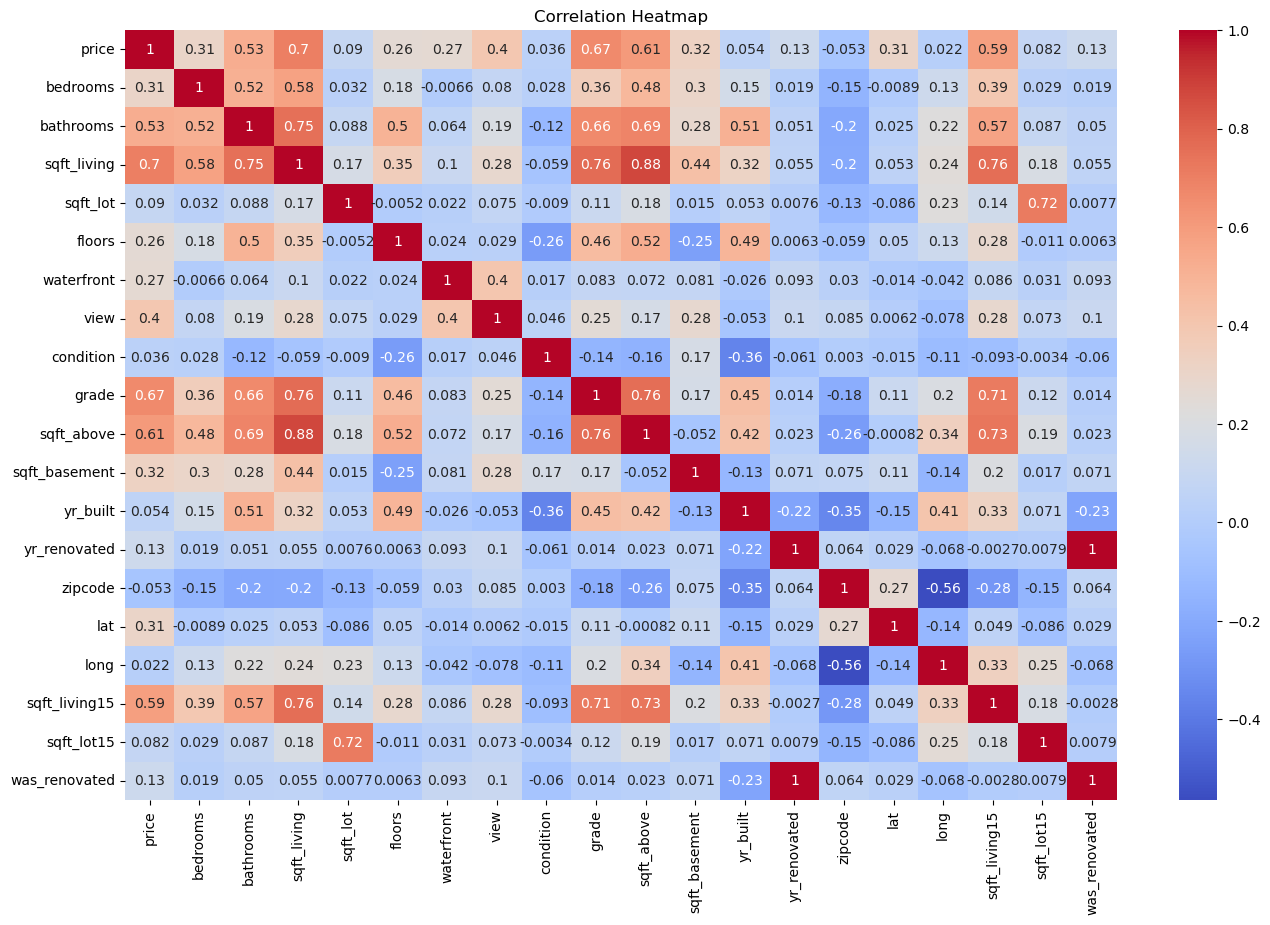

In [14]:
# Drop non-numeric columns
df_corr = df.drop(columns=['date'])  # or any other non-numeric columns like 'id' if it's there

# Then plot the heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 📈 Scatterplot: Living Space vs Price

This scatterplot shows the relationship between the size of the living space (in square feet) and the price of the house. There is a clear positive trend—larger homes tend to sell for higher prices. However, the data also shows some outliers with very large living spaces and unusually high prices. This suggests that while living space is a strong predictor of price, other factors such as location or luxury features may also influence high-end pricing.


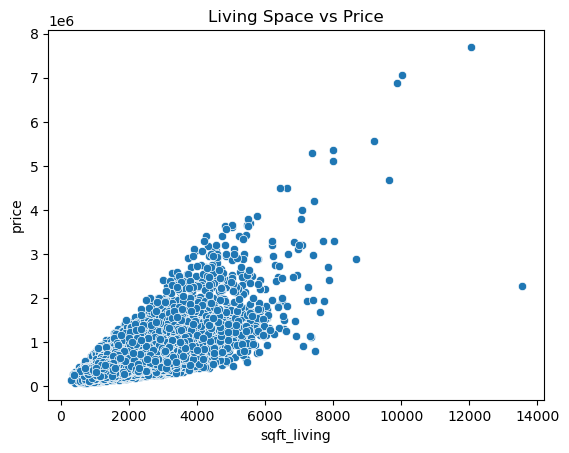

In [16]:
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Living Space vs Price')
plt.show()

### 🏗️ Boxplot: Renovated vs Unrenovated Houses and Price

This boxplot compares house prices based on whether or not the property has been renovated. 

We can observe that renovated homes (`was_renovated = 1`) have a slightly higher median price than unrenovated homes. The spread of prices is also slightly wider for renovated homes, suggesting that renovations may add value—especially in higher-end properties. However, the difference is not dramatic, indicating that renovation status alone may not be a strong standalone predictor of price.


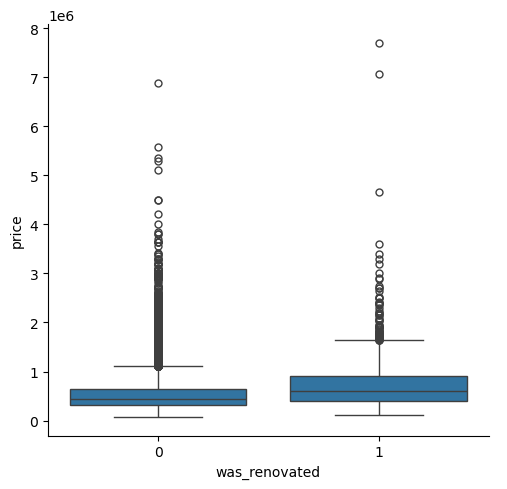

In [20]:
sns.catplot(data=df, x='was_renovated', y='price', kind='box')


### 📊 Scatterplot Interpretations: Price vs Key Features

These scatterplots examine the relationship between house price and three key features: square footage (`sqft_living`), property grade (`grade`), and number of bathrooms (`bathrooms`).

- **Sqft Living vs Price**: This shows a strong positive linear trend. As the living area increases, the price generally increases as well. There's a wide spread at higher square footage, indicating outliers or luxury homes.
- **Grade vs Price**: A clear upward trend is visible. Higher graded properties consistently sell for more, suggesting that grade (quality of construction/design) is a reliable predictor of price.
- **Bathrooms vs Price**: This also shows a positive correlation. As the number of bathrooms increases, the price tends to rise—although the relationship is not perfectly linear.

These relationships confirm that these features significantly impact house prices and are strong candidates for further analysis or predictive modeling.


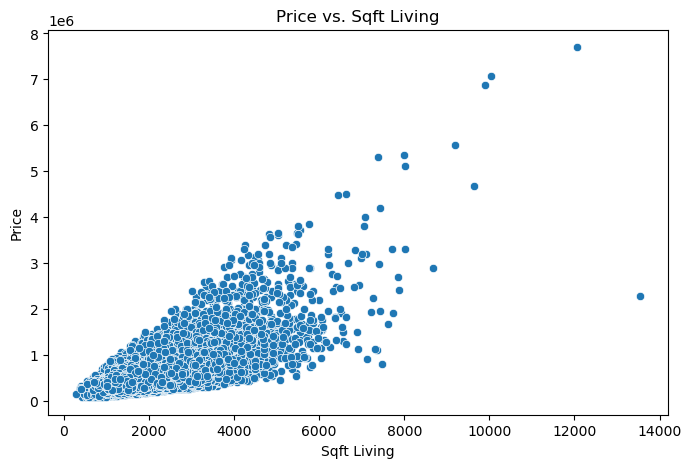

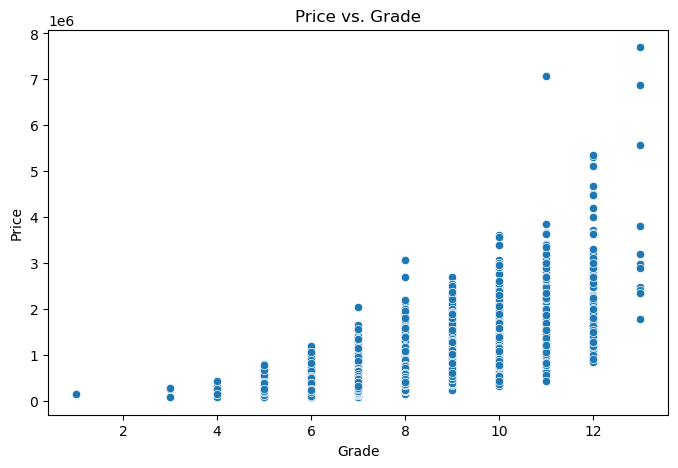

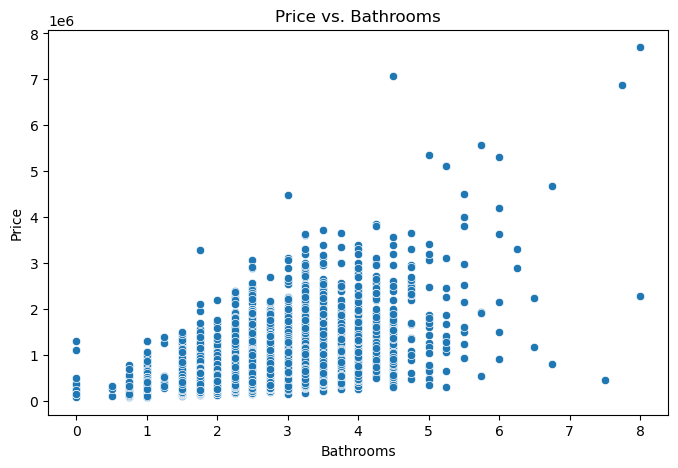

In [22]:

# Scatterplot: Price vs. Sqft Living
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

# Scatterplot: Price vs. Grade
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='grade', y='price')
plt.title('Price vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

# Scatterplot: Price vs. Bathrooms
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bathrooms', y='price')
plt.title('Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()


### 🔍 Pair Plot Interpretation: Key Variables

This pair plot provides a compact view of relationships between key features such as price, living space, bedrooms, bathrooms, grade, and square footage (above and basement).

**Notable Insights:**
- **Price vs. Sqft Living, Grade, and Bathrooms:** These relationships show strong upward trends, confirming that larger and higher-quality homes command higher prices.
- **Bedrooms vs. Price:** The relationship is weaker and more scattered, suggesting that simply having more bedrooms doesn't always mean a higher price.
- **Sqft Above vs. Sqft Living:** As expected, these are highly correlated since they represent similar measurements of home size.
- **Sqft Basement:** There's a moderate variation—while some basement areas contribute to price, the relationship is not as strong or consistent.

📌 Based on this, we can focus future modeling efforts on sqft_living, grade, and bathrooms as stronger predictors of price.


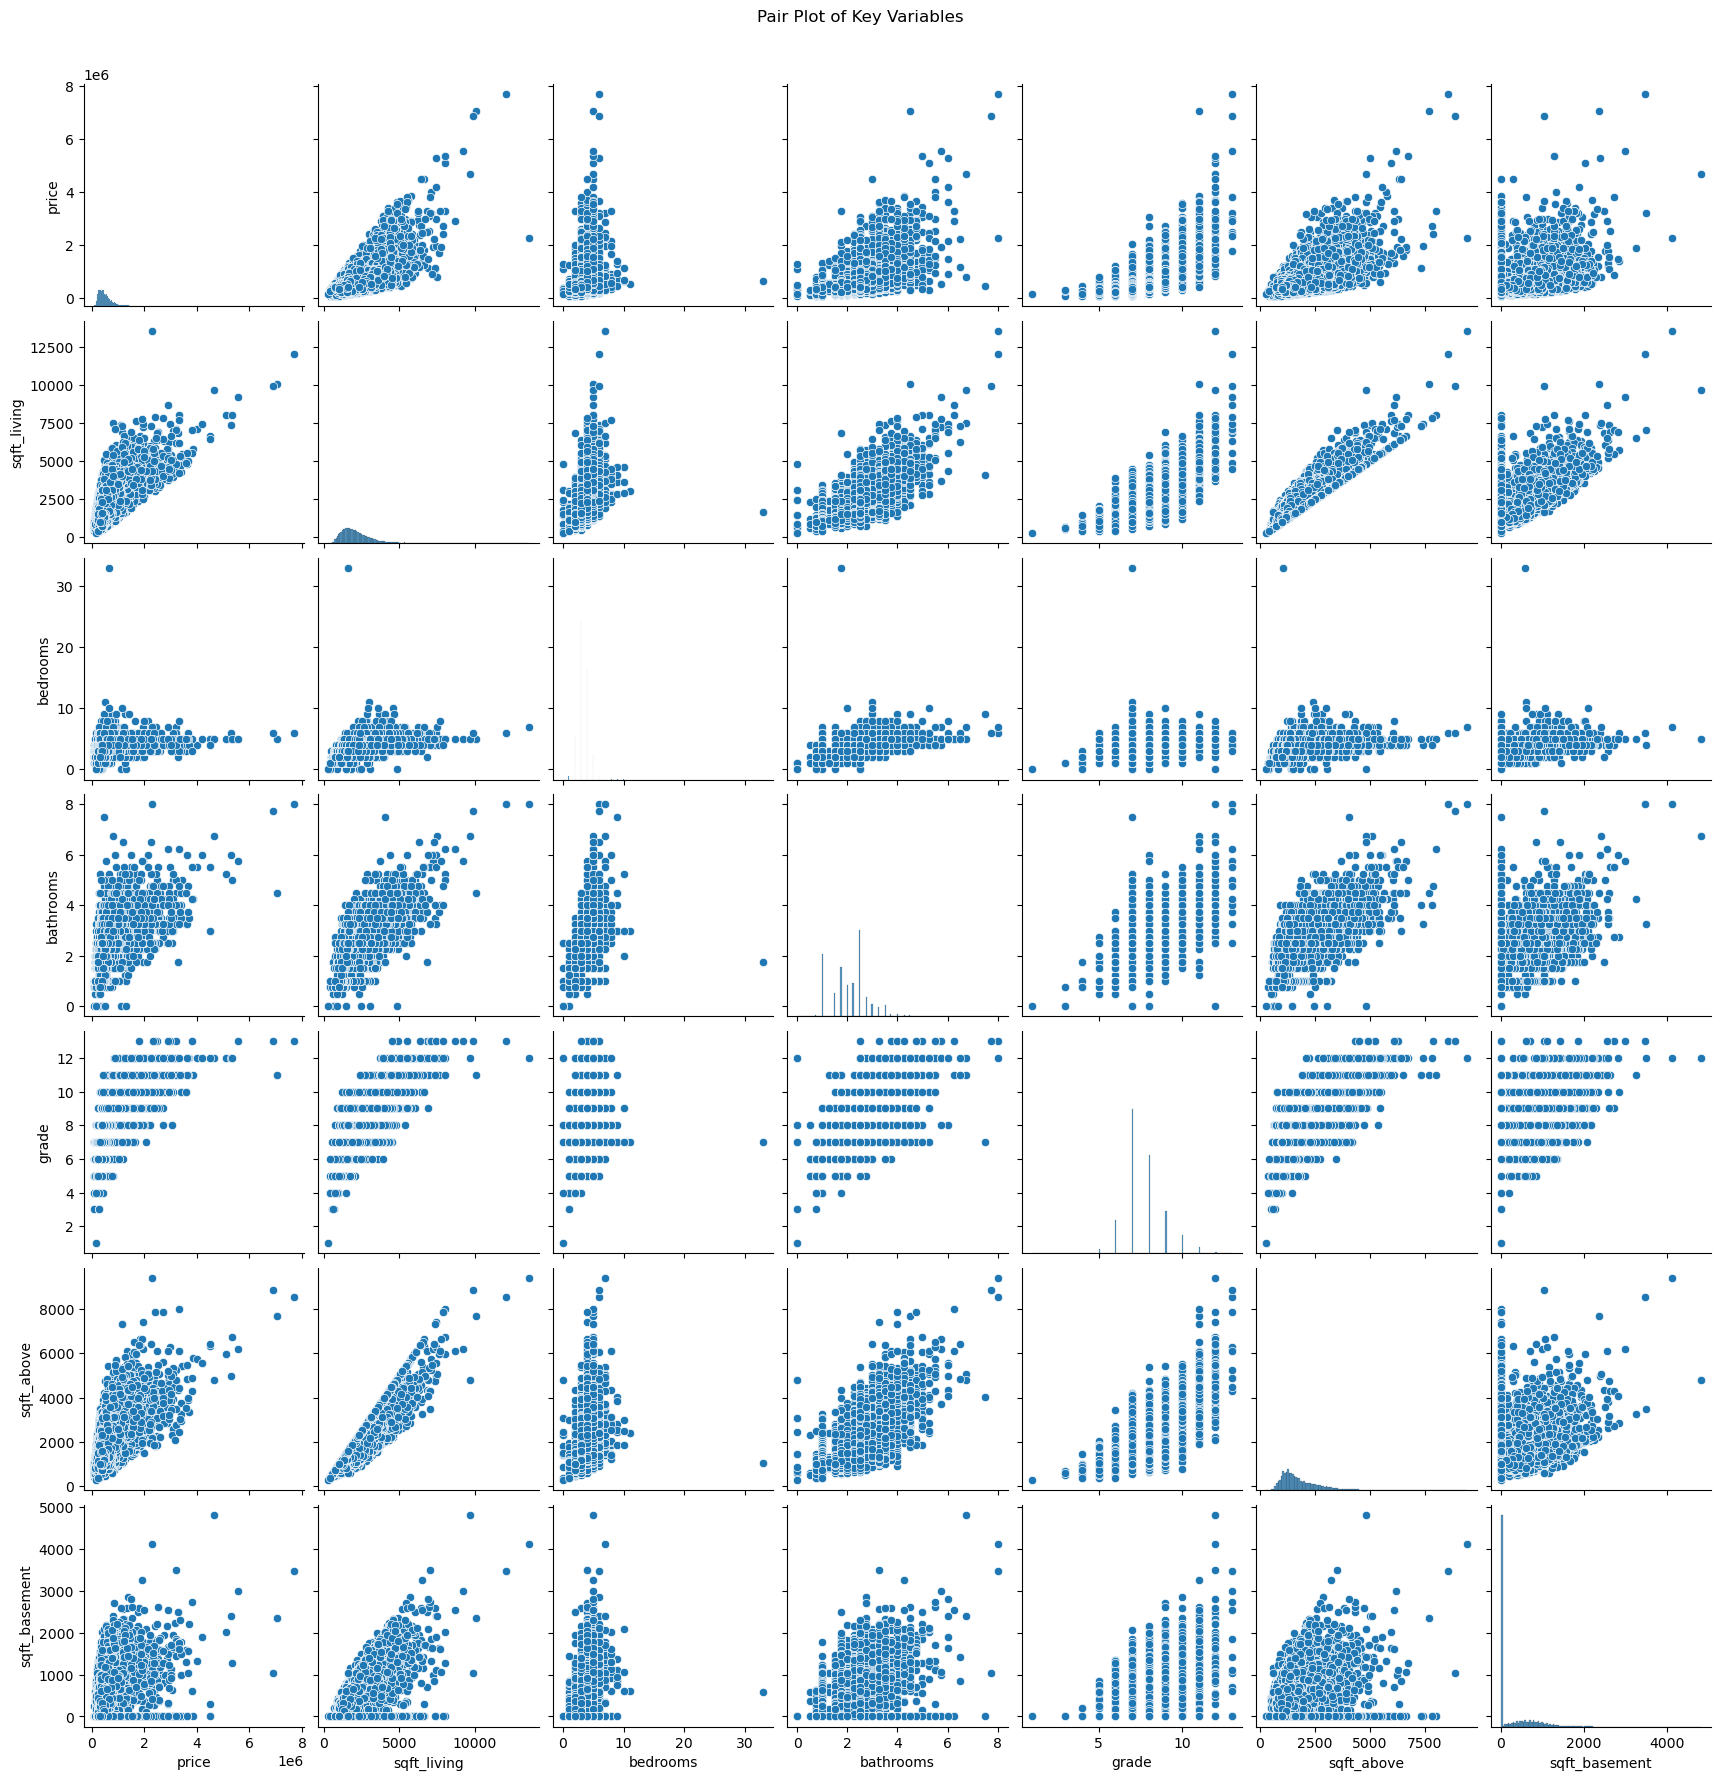

In [25]:
# Create a pairplot for key variables
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade', 'sqft_above', 'sqft_basement']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()


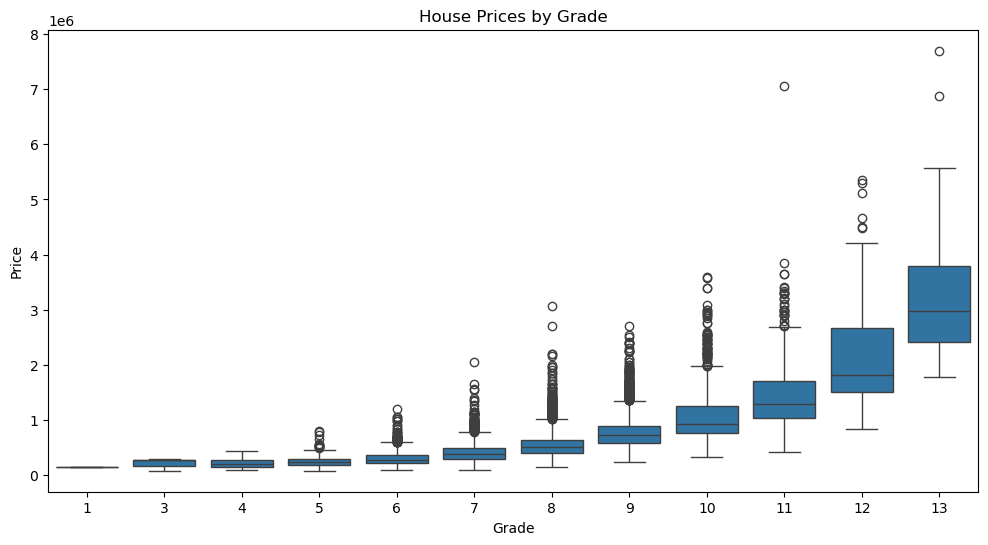

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='grade', y='price')
plt.title('House Prices by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

### 📊 **Boxplot Interpretation: Property Grade vs. Price**

This boxplot illustrates how house prices vary across different property grades. A clear positive trend emerges:  
**As the grade increases, the median house price also increases.**

- Houses with a grade of **7 or below** tend to have lower prices.  
- Grades **8 to 11** show a steep rise, indicating that higher construction and design quality significantly boosts value.  
- Grades **above 11** show high price variability, suggesting rare luxury homes.  

**Conclusion:** Grade is a strong predictor of price and should be considered in modeling.

### 🔁 **Revisited Questions & Early Insights**

**1. What factors most strongly influence house prices in King County?**  
→ Based on the heatmap and pair plot, the top correlated variables with price are:
- `sqft_living` (**0.70**)  
- `grade` (**0.67**)  
- `bathrooms` (**0.53**)  
- `sqft_above` (**0.61**)  
These features appear to significantly influence pricing.

**2. How do house prices vary across different zip codes?**  
→ `zipcode` has a weak correlation with price (**-0.05**), meaning it doesn't predict pricing on its own. But it might still reflect broader neighborhood trends (to explore spatially later).

**3. Do renovated houses sell for more than unrenovated ones?**  
→ `was_renovated` has a weak positive correlation with price (**0.13**). It has *some* impact but is not a strong standalone indicator.

**4. Is there a seasonal trend in house sales?**  
→ We haven’t explored temporal patterns yet — this will be covered in **Exercise 6.3**.

### 🧪 Hypotheses

Based on the exploratory visual analysis so far, here are some testable hypotheses:

1. **Larger houses (in terms of square footage) tend to have higher prices.**  
   _Rationale_: Strong positive correlations observed between `price` and both `sqft_living` (0.70) and `sqft_above` (0.61).

2. **Higher property grades result in higher house prices.**  
   _Rationale_: Boxplot showed a clear upward trend in price with increasing `grade` values.

3. **Houses with more bathrooms are more expensive.**  
   _Rationale_: Moderate positive correlation (0.53) between `bathrooms` and `price`.

4. **Renovated houses sell for slightly more than unrenovated houses.**  
   _Rationale_: Weak positive correlation (0.13) between `was_renovated` and `price`.

5. **Zip code alone is not a strong predictor of house prices.**  
   _Rationale_: Very weak correlation (−0.05) observed between `zipcode` and `price`.

We will test these hypotheses in upcoming exercises through further analysis and modeling.
